# 论文笔记

Reinforced Cross-Modal Matching and Self-Supervised Imitation Learning for Vision-Language Navigation

视觉语言导航的增强交叉模态匹配和自监督模仿学习

## Abstract
Vision-language navigation (VLN) is the task of navi- gating an embodied agent to carry out natural language instructions inside real 3D environments. In this paper, we study how to address three critical challenges for this task: the cross-modal grounding, the ill-posed feedback, and the generalization problems. First, we propose a novel Reinforced Cross-Modal Matching (RCM) approach that enforces cross-modal grounding both locally and globally via reinforcement learning (RL). Particularly, a matching critic is used to provide an intrinsic reward to encourage global matching between instructi

视觉语言导航(VLN)是在真实的三维环境中实现自然语言指令的嵌入式智能体的导航任务。在本文中，我们研究了如何解决这一任务的三个关键挑战:跨模态接地、不适定反馈和泛化问题。首先，我们提出了一种新的增强交叉模态匹配(RCM)方法，该方法通过增强学习(RL)来增强局部和全局的交叉模态接地。特别是，一个匹配评论家被用来提供一个内在的奖励来鼓励指令之间的全局匹配

## Introduction
Recently, vision-language grounded embodied agents have received increased attention [38, 25, 8] due to their popularity in many intriguing real-world applications, e.g., in-home robots and personal assistants. Meanwhile, such an agent pushes forward visual and language grounding by putting itself in an active learning scenario through first- person vision. In particular, Vision-Language Navigation (VLN) [3] is the task of navigating an agent inside real envi- ronments by following natural language instructions.
最近，基于视觉语言的嵌入式代理受到了越来越多的关注[38,25,8]，因为它们在许多有趣的现实世界应用中很受欢迎，例如，家用机器人和个人助理。同时，这种agent通过第一人称视觉，将自己置身于一个主动学习的情境中，推动视觉和语言的基础。特别是，视觉语言导航(VLN)[3]是通过遵循自然语言指令在真实环境中导航代理的任务。

VLN requires a deep understanding of linguistic semantics, visual perception, and most importantly, the alignment of the two. The agent must reason about the vision-language dynamics in order to move towards the target that is inferred from the instructions.

### VLN presents some unique challenges. 
* First, reasoning over visual images and natural language instructions can be difficult. As we demonstrate in Figure 1, to reach a destination, the agent needs to ground an instruction in the local visual scene, represented as a sequence of words, as well as match the instruction to the visual trajectory in the global temporal space. 
* Secondly, except for strictly following expert demonstrations, the feedback is rather coarse, since the “Success” feedback is provided only when the agent reaches a target position, completely ignoring whether the agent has followed the instructions (e.g., Path A in Figure 1)or followed a random path to reach the destination (e.g., Path C in Figure 1). Even a “good” trajectory that matches an instruction can be considered unsuccessful if the agent stops marginally earlier than it should be (e.g., Path B in Figure 1). An ill-posed feedback can potentially deviate from the optimal policy learning. 

* Thirdly, existing work suffers from the generalization problem, causing a huge performance gap between seen and unseen environments.


In this paper, we propose to combine the power of __reinforcement learning (RL)__ and __imitation learning (IL)__ to address the challenges above. 

First, we introduce a novel Reinforced Cross-Modal Matching (RCM) approach that enforces cross-modal grounding both locally and globally via RL. Specifically, we design a reasoning navigator that learns the cross-modal grounding in both the textual in- struction and the local visual scene, so that the agent can infer which sub-instruction to focus on and where to look at. From the global perspective, we equip the agent with a matching critic that evaluates an executed path by the probability of reconstructing the original instruction from it, which we refer to as the cycle-reconstruction reward. Locally, the cycle-reconstruction reward provides a fine- grained intrinsic reward signal to encourage the agent to better understand the language input and penalize the tra- jectories that do not match the instructions. For instance, using the proposed reward, Path B is considered better than Path C (see Figure 1).

Being trained with the intrinsic reward from the matching critic and the extrinsic reward from the environment, the reasoning navigator learns to ground the natural language instruction on both local spatial visual scene and global tem- poral visual trajectory. Our RCM model significantly out- performs the existing methods and achieves new state-of-the-art performance on the Room-to-Room (R2R) dataset.

Our experimental results indicate a large performance gap between seen and unseen environments. To narrow the gap, we propose an effective solution to explore unseen en- vironments with self-supervision. This technique is valu- able because it can facilitate lifelong learning and adaption to new environments. For example, domestic robots can explore a new home it arrives at and iteratively improve the navigation policy by learning from previous experience. Motivated by this fact, we introduce a __Self-Supervised Imitation Learning (SIL)__ method in favor of exploration on unseen environments that do not have labeled data. 

The agent learns to imitate its own past, good experience. Specifically, in our framework, the navigator performs multiple roll-outs, of which good trajectories (determined by the matching critic) are stored in the replay buffer and later used for the navigator to imitate. In this way, the navigator can approximate its best behavior that leads to a better policy. To sum- marize, our contributions are mainly three-fold:


* We propose a novel Reinforced Cross-Modal Matching (RCM) framework that utilizes both extrinsic and intrinsic rewards for reinforcement learning, of which we introduce a cycle-reconstruction reward as the intrinsic reward to enforce the global matching between the language instruction and the agent’s trajectory.
* Experiments show that RCM achieves the new state-of-the-art performance on the R2R dataset, and among the prior art, is ranked first1 in the VLN Challenge in terms of SPL, the most reliable metric for the task.
* We introduce a new evaluation setting for VLN, where exploring unseen environments prior to testing is allowed, and then propose a Self-Supervised Imitation Learning (SIL) method for exploration with self-supervision, whose effectiveness and efficiency are validated on the R2R dataset.

## Related Work
### Vision-and-Language Grounding
Recently, researchers in both computer vision and natural language processing are striving to bridge vision and natural language towards a deeper understanding of the world [53, 47, 22, 7, 19, 43, 21], e.g., captioning an image or a video with natural language [11, 12, 46, 48, 54, 55, 49] or localizing desired objects within an image given a natural language description [37, 20, 56, 57]. Moreover, visual question answering [4] and visual dialog [9] aim to generate one-turn or multi-turn response by grounding it on both visual and textual modalities. However, those tasks focus on passive vi- sual perception in the sense that the visual inputs are usually fixed. In this work, we are particularly interested in solving the dynamic multi-modal grounding problem in both temporal and spatial spaces. Thus, we focus on the task of vision-language navigation (VLN) [3] which requires the agent to actively interact with the environment.
### Embodied Navigation Agent 
Navigation in 3D environments [58, 29, 30, 16] is an essential capability of a mobile intelligent system that functions in the physical world. In the past two years, a plethora of tasks and evaluation protocols [38, 25, 40, 52, 3] have been proposed as summarized in [1]. VLN [3] focuses on language-grounded navigation in the real 3D environment. In order to solve the VLN task, Anderson et al. [3] set up an attention-based sequence-to-sequence baseline model. Then Wang et al. [50] in- troduced a hybrid approach that combines model-free and model-based reinforcement learning (RL) to improve the model’s generalizability. Lately, Fried et al. [13] proposed a speaker-follower model that adopts data augmentation, panoramic action space and modified beam search for VLN, establishing the current state-of-the-art performance on theRoom-to-Room dataset. Extending prior work, we propose a Reinforced Cross-Modal Matching (RCM) approach to VLN. 

The RCM model is built upon [13] but differs in many significant aspects: 

* (1) we combine a novel multireward RL with imitation learning for VLN while Speaker- Follower models [13] only uses supervised learning as in [3]. 
* (2) Our reasoning navigator performs cross-modal grounding rather than the temporal attention mechanism on single-modality input. 
* (3) Our matching critic is similar to Speaker in terms of the architecture design, but the former is used to provide the cycle-reconstruction intrinsic reward for both RL and SIL training while the latter is used to augment training data for supervised learning. 

* Moreover, we introduce a self-supervised imitation learning method for exploration in order to explicitly address the generalization issue, which is a problem not well-studied in prior work. Concurrent to our work, [44, 23, 27, 28] studies the VLN tasks from various aspects, and [31] introduces a variant of the VLN task to find objects by requesting language assistance when needed. Note that we are the first to propose to explore unseen environments for the VLN task.
### Exploration 
Much work has been done on improving exploration [5, 14, 18, 33, 42] because the trade-off between exploration and exploitation is one of the fundamental challenges in RL. The agent needs to exploit what it has learned to maximize reward and explore new territories for better policy search. Curiosity or uncertainty has been used as a signal for exploration [39, 41, 26, 34]. Most recently, Oh et al. [32] proposed to exploit past good experience for better exploration in RL and theoretically justified its effectiveness. Our Self-Supervised Imitation Learning (SIL) method shares the same spirit. But instead of testing on games, we adapt SIL and validate its effectiveness and efficiency on the more practical task of VLN.

## 论文笔记(Introduction & Related work)
### Vision-language navigation (VLN) 视觉语言导航的任务
1. 大概的过程就是机器接收人的语音指令(一个声音序列)，
1. 经过理解和推理，转化为一个动作指令序列，机器人根据这根指令序列，来进行一系列动作。
1. 在执行动作的过程中，整个环境会发生变化，机器人需要结合传入的图像信息，来调整动作序列，直到最终完成语音指令的任务。

对于每一个环节，都有巨大的挑战，而VLN还需要把各个环节进行配合，难度可想而知。

### 目前VLN面临的主要挑战
* 首先，对视觉图像和自然语言指令进行推理是困难的。正如我们在图1中所演示的，为了到达目的地，agent需要在局部的视觉场景中接地一条指令，表示为一个单词序列，并在全局的时间空间中将指令与视觉轨迹进行匹配。
* 其次，除了严格遵循专家演示之外，反馈是相当粗略的，因为仅当代理人到达目标位置时才提供“成功”反馈，而完全忽略了代理人是否已遵循指令（例如，图1中的路径A） 或遵循随机路径到达目的地（例如，图1中的路径C）。 如果代理稍微早于其应有的停止时间（例如，图1中的路径B），则即使是与指令匹配的“良好”轨迹也不会被视为不成功。 不适当地反馈可能会偏离最佳策略学习。
* 第三，现有的工作存在泛化问题，在可见和不可见的环境之间造成了巨大的性能差距。
### 论文主要做的工作
* 出了一种新颖的强化跨模态匹配（RCM）框架，该框架利用外部奖励和内在奖励来进行强化学习，其中我们引入了循环重建奖励作为内在奖励，以加强语言教学与主体轨迹之间的全局匹配
* 实验表明，RCM在R2R数据集上达到了最新的性能水平，在现有技术中，就SPL（最可靠的指标）而言，它在VLN挑战赛中排名第一。
* 为VLN引入了一种新的评估设置，允许在测试之前探索看不见的环境，然后提出一种具有自我监督能力的自我监督模仿学习（SIL）方法，其有效性和效率已在R2R数据集上得到验证。

## Reinforced Cross-Modal Matching 
### Overview
Here we consider an embodied agent that learns to navigate inside real indoor environments by following natural language instructions. 

The RCM framework mainly consists of two modules (see Figure 2): 
* a reasoning navigator πθ 
* and a matching critic Vβ . 
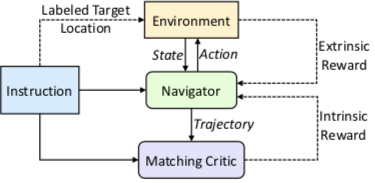
Given the initial state s0 and the natural language instruction (a sequence of words) X = x1 , x2 , ..., xn , 

the reasoning navigator learns to perform a sequence of actions a1 , a2 , ..., aT ∈ A, which generates a trajectory τ , in order to arrive at the target location starget indicated by the instruction X . 

The navigator interacts with the environment and perceives new visual states as it executes actions. 

To promote the generalizability and reinforce the policy learning, we introduce two reward functions: an extrinsic reward that is provided by the environment and measures the success signal and the navigation error of each action, and an intrinsic reward that comes from our matching critic and measures the alignment between the language instruction X and the navigator’s trajectory τ .
### Model
Here we discuss the reasoning navigator and matching critic in details, both of which are end-to-end trainable.
#### Cross-Modal Reasoning Navigator
The navigator πθ is a policy-based agent that maps the input instruction X onto a sequence of actions {at }Tt=1 . At each time step t, the navigator receives a state st from the environment and needs to ground the textual instruction in the local visual scene. Thus, we design a cross-modal reasoning navigator that learns the trajectory history, the focus of the textual instruction, and the local visual attention in order, which forms a cross-modal reasoning path to encourage the local dynamics of both modalities at step t.
Figure 3 shows the unrolled version of the navigator at time step t. Similar to [13], we equip the navigator with a panoramic view, which is split into image patches of m different viewpoints, so the panoramic features that are extracted from the visual state st can be represented as {vt,j}mj=1, where vt,j denotes the pre-trained CNN feature of the image patch at viewpoint j.
History Context Once the navigator runs one step, the visual scene would change accordingly. The history of the trajectory τ1:t till step t is encoded as a history context vector ht by an attention-based trajectory encoder LSTM [17]:
ht = LSTM([vt,at−1],ht−1) (1)
where at−1 is the action taken at previous step, and vt = 􏰀j αt,j vt,j , the weighted sum of the panoramic features. αt,j is the attention weight of the visual feature vt,j , representing its importance with respect to the previous history context ht−1. Note that we adopt the dot-product attention [45] hereafter, which we denote as (taking the attention

